Complete MSA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from src.stats.from_ilp_log import LoggInfo
from src.utils.params_from_path import params_from_pathlog_alpha as params_from_pathlog

loginfo=LoggInfo(times=False, counts=False, sizes=False, usrbintime=True)


NSEQS = 50
NAME = f"{NSEQS}-SARS-CoV2-MSA"
PATH = Path("/data/analysis-paper/experiments-decompositions")

COMPLETE = PATH.joinpath(f"sars-cov-2-{NSEQS}-complete-not_alpha_consistent-not_fixblock")
ROW_MAXIMAL = PATH.joinpath(f"sars-cov-2-{NSEQS}-row_maximal-not_alpha_consistent-not_fixblock")

PATH_LOG_PGGB = Path("/data/analysis-paper/experiments/pggb/sars-cov-2/logs/")
PATH_LOG_VG   = Path("/data/analysis-paper/experiments/vg/sars-cov-2/logs/")


In [2]:

## Fontsizes plots
FONTSIZE_TITLE = 18
FONTSIZE_SUBTITLE = 16
FONTSIZE_X = 16
FONTSIZE_Y = 16
FONTSIZE_TOOLS = 14 

FONTSIZE_GRID_TITLE = 18
FONTSIZE_GRID_SUBTITLE = 16
FONTSIZE_GRID_X = 16
FONTSIZE_GRID_Y = 16
FONTSIZE_GRID_TOOLS = 14 

LEGEND = True

In [3]:
PATH_SAVE = Path(f"../output-experiments-paper/sars-cov-2-{NSEQS}-complete-msa/")
PATH_SAVE.mkdir(exist_ok=True, parents=True)

In [4]:
info_pggb = dict()
for path_log in PATH_LOG_PGGB.glob("*err.log"):
    name = path_log.stem.split("-rule")[0]

    info = loginfo(path_log)["usrbintime"][0]
    info["Max RAM (GB)"] = info["Maximum resident set size (kbytes)"] / 1_000_000
    info_pggb[name] = info
info_pggb = info_pggb[NAME]

In [5]:
info_pggb

{'User time (seconds)': 184.05,
 'System time (seconds)': 267.87,
 'Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds)': 61.41,
 'Maximum resident set size (kbytes)': 1245924.0,
 'Max RAM (GB)': 1.245924}

In [6]:
info_vg = dict()
for path_log in PATH_LOG_VG.glob("*err.log"):
    name = path_log.stem.split("-rule")[0]

    info = loginfo(path_log)["usrbintime"][0]
    info["Max RAM (GB)"] = info["Maximum resident set size (kbytes)"] / 1_000_000
    info_vg[name] = info
info_vg = info_vg[NAME]

In [7]:
list_params = []
for log in ROW_MAXIMAL.joinpath("logs").rglob("*.log"):
    if "rule-ilp" in str(log): # and "nodes" in str(log):
        # print(log)
        params = params_from_pathlog(log)     # pangeblocks params
        params.update( loginfo(log)["usrbintime"][0] ) # logging info 
        params["decomposition"] = "row-maximal"
        list_params.append( params)

In [8]:

for log in COMPLETE.joinpath("logs").rglob("*.log"):
    if "rule-ilp" in log.stem:
        # print(log)
        params = params_from_pathlog(log)     # pangeblocks params
        params.update( loginfo(log)["usrbintime"][0] ) # logging info 
        params["decomposition"] = "complete"
        list_params.append( params)

In [9]:
log

PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-depth-penalization1000-min_len0-min_coverage0.3-alpha116-rule-ilp.log')

In [10]:
list(x for x in COMPLETE.joinpath("logs").rglob("*.log") if "rule-ilp" in x.stem)

[PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-depth-penalization1000-min_len0-min_coverage0.5-alpha106-rule-ilp.log'),
 PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-depth_and_len-penalization0-min_len0-min_coverage0-alpha179-rule-ilp.log'),
 PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-depth_and_len-penalization0-min_len0-min_coverage0-alpha178-rule-ilp.log'),
 PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-nodes-penalization0-min_len0-min_coverage0-alpha310-rule-ilp.log'),
 PosixPath('/data/analysis-paper/experiments-decompositions/sars-cov-2-50-complete-not_alpha_consistent-not_fixblock/logs/50-SARS-CoV2-MSA-depth_and_le

In [11]:
data = pd.DataFrame(list_params)
data["Max RAM (GB)"] = data["Maximum resident set size (kbytes)"].apply(lambda d: d / 1_000_000)
# data["columns"] = data["end"] - data["start"] +1 
data.to_csv(PATH_SAVE.joinpath("usrbintime.tsv"))
data.head()


,name,objective_function,penalization,min_len,min_coverage,alpha,User time (seconds),System time (seconds),Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds),Maximum resident set size (kbytes),decomposition,Max RAM (GB)
0,50-SARS-CoV2-MSA,weighted,1000,30,0.0,106,614.36,12.11,626.15,7503464.0,row-maximal,7.503464
1,50-SARS-CoV2-MSA,weighted,1000,20,0.0,179,2170.60,75.04,2246.88,30073856.0,row-maximal,30.073856
2,50-SARS-CoV2-MSA,depth,1000,0,0.3,42,156.15,4.33,159.87,1487444.0,row-maximal,1.487444
3,50-SARS-CoV2-MSA,weighted,1000,15,0.0,264,2355.22,72.92,2430.71,21182416.0,row-maximal,21.182416
4,50-SARS-CoV2-MSA,weighted,1000,20,0.0,178,1978.08,87.20,2066.98,26177308.0,row-maximal,26.177308


In [12]:
feature = "Max RAM (GB)"
# min and max y-axis values
feat_min = data[feature].min()
feat_max = max(data[feature].max(), info_pggb[feature], info_vg[feature]) 
delta_range = feat_max - feat_min
ymin = feat_min - 0.1*delta_range 
ymax = feat_max + 0.1*delta_range

In [13]:
info_pggb

{'User time (seconds)': 184.05,
 'System time (seconds)': 267.87,
 'Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds)': 61.41,
 'Maximum resident set size (kbytes)': 1245924.0,
 'Max RAM (GB)': 1.245924}

In [14]:
data.head()

,name,objective_function,penalization,min_len,min_coverage,alpha,User time (seconds),System time (seconds),Elapsed (wall clock) time (h:mm:ss or m:ss) (seconds),Maximum resident set size (kbytes),decomposition,Max RAM (GB)
0,50-SARS-CoV2-MSA,weighted,1000,30,0.0,106,614.36,12.11,626.15,7503464.0,row-maximal,7.503464
1,50-SARS-CoV2-MSA,weighted,1000,20,0.0,179,2170.60,75.04,2246.88,30073856.0,row-maximal,30.073856
2,50-SARS-CoV2-MSA,depth,1000,0,0.3,42,156.15,4.33,159.87,1487444.0,row-maximal,1.487444
3,50-SARS-CoV2-MSA,weighted,1000,15,0.0,264,2355.22,72.92,2430.71,21182416.0,row-maximal,21.182416
4,50-SARS-CoV2-MSA,weighted,1000,20,0.0,178,1978.08,87.20,2066.98,26177308.0,row-maximal,26.177308


## RAM

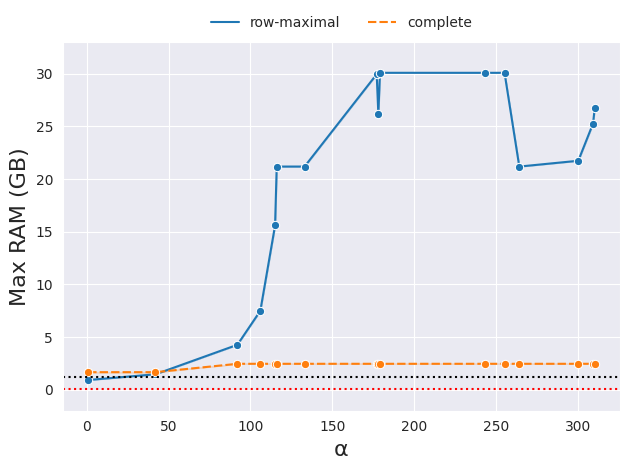

In [15]:
sns.set_style(style="darkgrid")
g_ram = sns.lineplot(
    data=data, 
    x="alpha", y=feature, 
    hue="decomposition", 
    style="decomposition", 
    marker="o",
    )# hue_order=OBJ_FUNCTIONS)
# g_ram.text(x=0.5, y=1.1, s=f'{NAME} | Potential seeds of length 15 w.r.t. {chr(945)}', fontsize=FONTSIZE_TITLE, weight='bold', ha='center', va='bottom', transform=g_ram.transAxes)
# g_potential_seeds.text(x=0.5, y=1.05, s=f'Complete vs Row-maximal decomposition | not-{chr(945)}-consistent', fontsize=FONTSIZE_SUBTITLE, alpha=0.75, ha='center', va='bottom', transform=g_potential_seeds.transAxes)
g_ram.set_xlabel(f"{chr(945)}", fontsize=FONTSIZE_X)
g_ram.set_ylabel("Max RAM (GB)", fontsize=FONTSIZE_Y)
g_ram.set_ylim([ymin,ymax])

# add pggb
g_ram.axhline(y=info_pggb[feature], linestyle=":",color = "black", label="pggb")
# ax.text(x=-2, y=info_pggb[NAME][feature],s="pggb", color="black")

# add vg
g_ram.axhline(y=info_vg[feature], linestyle=":",color = "red", label="feature")

sns.move_legend(
    g_ram, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="", frameon=False,
)

g_ram.figure.tight_layout()
g_ram.get_figure().savefig(PATH_SAVE.joinpath(f"{NAME}-ilp-instances-RAM.png"),dpi=300)

## User Time

In [16]:
feature = "User time (seconds)"
# min and max y-axis values
feat_min = data[feature].min()
feat_max = max(data[feature].max(), info_pggb[feature], info_vg[feature]) 
delta_range = feat_max - feat_min
ymin = feat_min - 0.1*delta_range 
ymax = feat_max + 0.1*delta_range

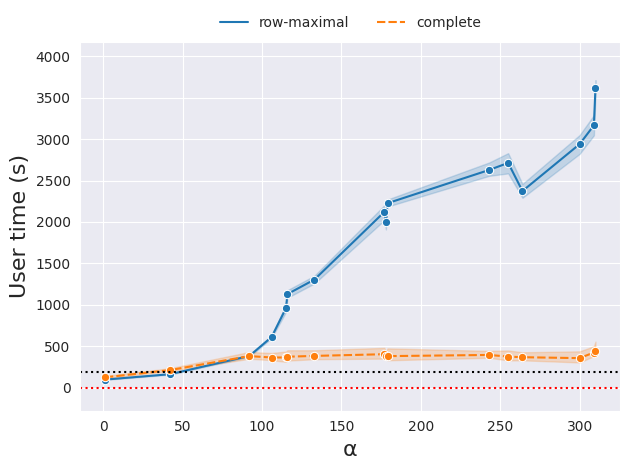

In [17]:
g_ram = sns.lineplot(
    data=data, 
    x="alpha", y=feature, 
    hue="decomposition", 
    style="decomposition", 
    marker="o",
    )# hue_order=OBJ_FUNCTIONS)
# g_ram.text(x=0.5, y=1.1, s=f'{NAME} | Potential seeds of length 15 w.r.t. {chr(945)}', fontsize=FONTSIZE_TITLE, weight='bold', ha='center', va='bottom', transform=g_ram.transAxes)
# g_potential_seeds.text(x=0.5, y=1.05, s=f'Complete vs Row-maximal decomposition | not-{chr(945)}-consistent', fontsize=FONTSIZE_SUBTITLE, alpha=0.75, ha='center', va='bottom', transform=g_potential_seeds.transAxes)
g_ram.set_xlabel(f"{chr(945)}", fontsize=FONTSIZE_X)
g_ram.set_ylabel("User time (s)", fontsize=FONTSIZE_Y)
g_ram.set_ylim([ymin,ymax])

# add pggb
g_ram.axhline(y=info_pggb[feature], linestyle=":",color = "black", label="pggb")
# ax.text(x=-2, y=info_pggb[NAME][feature],s="pggb", color="black")

# add vg
g_ram.axhline(y=info_vg[feature], linestyle=":",color = "red", label="feature")


sns.move_legend(
    g_ram, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="", frameon=False,
)

g_ram.figure.tight_layout()
g_ram.get_figure().savefig(PATH_SAVE.joinpath(f"{NAME}-ilp-instances-User_time.png"),dpi=300)